In [1]:
import boto3
import json
import numpy as np
from typing import List, Union
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
def cosine_similarity(v1: Union[List[float], np.ndarray],
                      v2: Union[List[float], np.ndarray]) -> float:
    """Calculate the cosine similarity between two vectors."""
    #convert to numpy array
    v1_array = np.array(v1)
    v2_array = np.array(v2)
    #check equal length
    if v1_array.shape != v2_array.shape:
        raise ValueError("Vectors must be of the same length")
    #dot product
    dot_product = np.dot(v1_array, v2_array)
    magnitude1 = np.linalg.norm(v1_array)
    magnitude2 = np.linalg.norm(v2_array)
    #check for zero vectors
    if magnitude1 == 0 or magnitude2 == 0:
        raise ValueError("One or both vectors are zero vectors")
    #calculate cosine similarity
    similarity = dot_product / (magnitude1 * magnitude2)
    #float precision
    return max(min(similarity, 1.0), -1.0)

In [4]:
bedrock = boto3.client('bedrock-runtime', region_name='us-east-1')
#function to get embedding from Bedrock
def get_embedding(text): 
    input_body = {
        "inputText": text,
    }

    response = bedrock.invoke_model(
        modelId="amazon.titan-embed-text-v1", 
        body=json.dumps(input_body)
    )

    response_body = json.loads(response['body'].read()) 
    return response_body['embedding']

In [5]:
#test the function
text = "Embeddings are useful for natural language processing tasks."
embedding = get_embedding(text)
print("Embedding:", embedding)

Embedding: [0.05078125, 0.61328125, 0.353515625, 0.197265625, 0.1806640625, 0.17578125, -0.427734375, -2.8371810913085938e-05, 0.275390625, 0.09765625, 0.006805419921875, 0.2265625, 0.60546875, 0.38671875, -0.59765625, -0.1494140625, 0.283203125, 1.1015625, -0.5625, 0.1005859375, 0.0208740234375, -0.1533203125, -0.369140625, -0.53125, 0.392578125, -0.08154296875, -0.498046875, -0.1767578125, 0.384765625, 0.1689453125, -0.1923828125, -0.498046875, 0.8125, 0.69140625, -0.1787109375, 0.1591796875, 0.392578125, 0.95703125, 0.150390625, 4.887580871582031e-05, 0.14453125, -0.72265625, -0.06396484375, -0.51953125, 0.2080078125, 0.287109375, -0.259765625, 0.78125, 0.431640625, 0.134765625, 0.2373046875, -0.37109375, -0.5390625, 0.1494140625, 0.236328125, 0.10546875, -0.3203125, 0.123046875, -0.05029296875, 0.181640625, 0.052490234375, -0.26171875, -0.025390625, -0.30078125, -0.5546875, 0.318359375, -0.138671875, -0.37890625, 0.09765625, 0.126953125, -0.40625, 0.0166015625, 0.453125, -0.3320312

In [6]:
texts = [ "The cat sat on the mat.", "A feline rested on a rug.", "Dogs are loyal companions.", "Artificial intelligence is reshaping technology." ]

# Get embeddings for all texts
embeddings = [get_embedding(text) for text in texts]
print("Embeddings for texts:")
print(embeddings)

Embeddings for texts:
[[0.208984375, 0.04736328125, 0.197265625, 0.1298828125, -0.326171875, -0.158203125, 0.19921875, -8.96453857421875e-05, 0.126953125, -0.158203125, -0.26953125, -0.020263671875, 0.030517578125, -0.1064453125, 0.291015625, -0.09716796875, 0.01251220703125, -0.421875, -0.33203125, -0.1142578125, -0.6484375, -0.126953125, -0.408203125, 0.53125, -0.043212890625, 0.158203125, 0.76953125, -0.7578125, 1.0859375, -0.609375, 0.11279296875, 0.212890625, -0.1884765625, -0.034912109375, 0.146484375, 0.443359375, 0.486328125, 0.09814453125, 0.400390625, -0.068359375, -0.53515625, 0.30859375, -0.1220703125, 0.359375, 0.466796875, 0.458984375, -0.515625, -0.1484375, -0.0732421875, -0.2333984375, -0.65625, -0.40234375, -0.0164794921875, -0.0771484375, 0.251953125, 0.384765625, -0.1640625, 0.609375, -0.79296875, 0.00092315673828125, -0.023681640625, 0.3515625, -0.1396484375, 0.2119140625, -0.08447265625, -0.416015625, 0.71875, 0.294921875, -0.78515625, 0.1328125, -0.7421875, -0.535

In [ ]:
embedding_2d = np.array(embeddings)
# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_embeddings = tsne.fit_transform(embedding_2d)

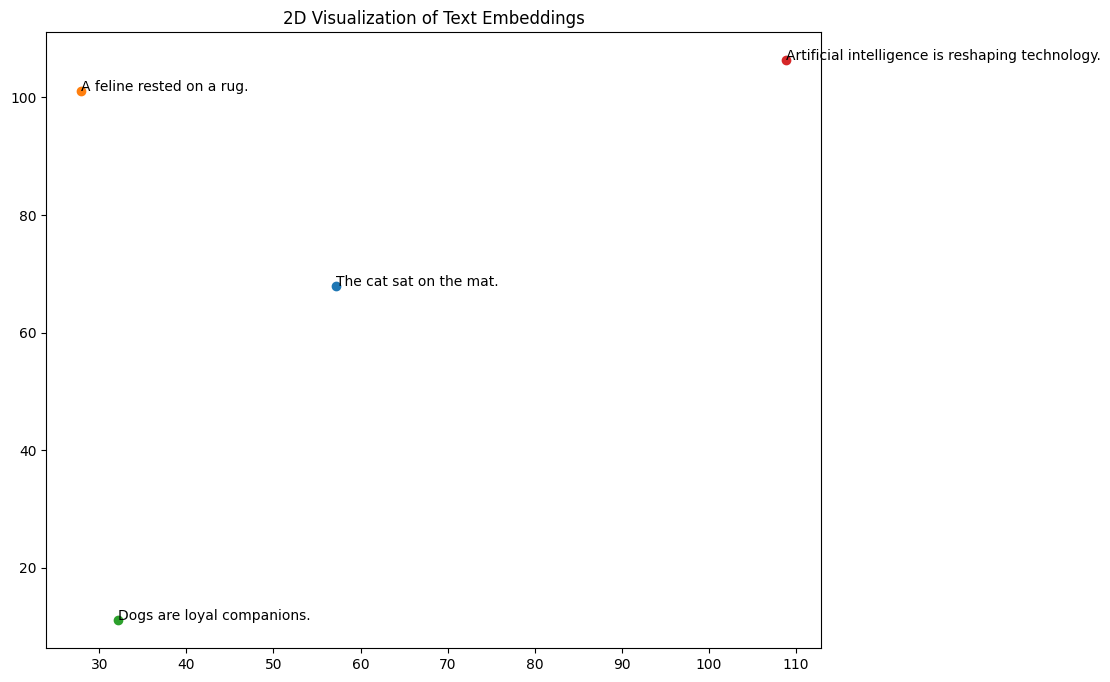

In [ ]:
# Plot the reduced embeddings
plt.figure(figsize=(10, 8))
for i, text in enumerate(texts):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.annotate(text, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title("2D Visualization of Text Embeddings")
plt.show()

In [ ]:
#find the most similar pair
def find_most_similar(query_embedding, embeddings, texts): 
    similarities = [cosine_similarity(query_embedding, emb) for emb in embeddings] 
    most_similar_index = np.argmax(similarities) 
    return texts[most_similar_index], similarities[most_similar_index]

query = "A dog is a loyal pet." 
query_embedding = get_embedding(query) 
most_similar_text, similarity = find_most_similar(query_embedding, embeddings, texts) 
print(f"Query: {query}") 
print(f"Most similar text: {most_similar_text}") 
print(f"Similarity score: {similarity}") 

Query: A dog is a loyal pet.
Most similar text: Dogs are loyal companions.
Similarity score: 0.8656458706930833
